# Работа с полиномами в Питоне.

По материалам  http://acm.mipt.ru/twiki/bin/view/Cintro/InterpolPython .

In [137]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline


In [138]:
p1 = P.Polynomial([1, 2, 3])
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [139]:
p2 = P.Polynomial.fromroots([-1, 1])
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [140]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [141]:
p2.roots()

array([-1.,  1.])

In [142]:
p1(2)

17.0

In [143]:
p2(3)

8.0

In [144]:
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [145]:
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [146]:
p1+p2

Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [147]:
p = p1*p2
p

Polynomial([-1., -2., -2.,  2.,  3.], domain=[-1.,  1.], window=[-1.,  1.])

In [148]:
p.deriv()

Polynomial([-2., -4.,  6., 12.], domain=[-1.,  1.], window=[-1.,  1.])

In [149]:
p.deriv(2)

Polynomial([-4., 12., 36.], domain=[-1.,  1.], window=[-1.,  1.])

In [150]:
help(P.polynomial)

Help on module numpy.polynomial.polynomial in numpy.polynomial:

NAME
    numpy.polynomial.polynomial

DESCRIPTION
    Power Series (:mod:`numpy.polynomial.polynomial`)
    
    This module provides a number of objects (mostly functions) useful for
    dealing with polynomials, including a `Polynomial` class that
    encapsulates the usual arithmetic operations.  (General information
    on how this module represents and works with polynomial objects is in
    the docstring for its "parent" sub-package, `numpy.polynomial`).
    
    Classes
    -------
    .. autosummary::
       :toctree: generated/
    
       Polynomial
    
    Constants
    ---------
    .. autosummary::
       :toctree: generated/
    
       polydomain
       polyzero
       polyone
       polyx
    
    Arithmetic
    ----------
    .. autosummary::
       :toctree: generated/
    
       polyadd
       polysub
       polymulx
       polymul
       polydiv
       polypow
       polyval
       polyval2d
       p

In [151]:
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [152]:
pi = p1.integ()
pi

Polynomial([0., 1., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.])

In [153]:
pi.deriv()

Polynomial([1., 2., 3.], domain=[-1.,  1.], window=[-1.,  1.])

In [154]:
p0 = P.Polynomial([0, 1])
p0

Polynomial([0., 1.], domain=[-1,  1], window=[-1,  1])

In [155]:
p0.deriv()

Polynomial([1.], domain=[-1.,  1.], window=[-1.,  1.])

In [156]:
p0.integ()

Polynomial([0. , 0. , 0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [157]:
p0.integ(2)

Polynomial([0.        , 0.        , 0.        , 0.16666667], domain=[-1.,  1.], window=[-1.,  1.])

In [158]:
p0.integ(m=1, lbnd=-3)

Polynomial([-4.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [159]:
c1 = P.Chebyshev.fromroots([-1, 1])
c1

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

# Интерполяция, а не работа с полиномами

In [160]:
import numpy as np

In [161]:
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

In [162]:
y = np.array([1, 3, 5, 4])
y

array([1, 3, 5, 4])

максимальная степень полинома - на 1 меньше, чем количество точек

In [163]:
deg = len(x) -1 
deg

3

Построим интерполяционный многочлен (полиномиальный)

In [164]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [165]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

In [166]:
import matplotlib.pyplot as plt

In [167]:
xx = np.linspace(x.min(), x.max(), 100)

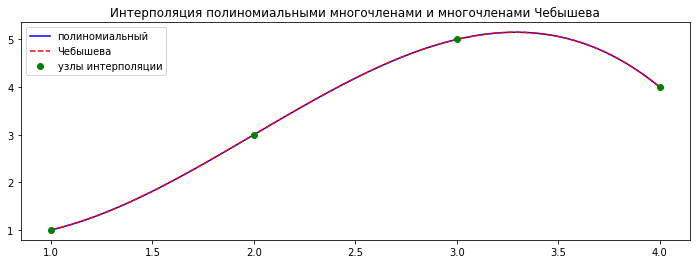

In [168]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_title('Интерполяция полиномиальными многочленами и многочленами Чебышева')
ax.plot(xx, f1b(xx), 'b', label='полиномиальный')
ax.plot(xx, f2b(xx), 'r--', label='Чебышева')
ax.plot(x, y, 'go', label='узлы интерполяции')
ax.legend()


# Пример биений на функции Рунге

In [169]:
def runge(x):
    return 1/(1 + 25 * x**2)

In [170]:
runge(0)

1.0

In [171]:
runge(1)

0.038461538461538464

In [172]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n)
    f = P.Polynomial.fit(x, runge(x), n)
    return x, f

In [173]:
from scipy.interpolate import interp1d

/usr/local/lib/python3.7/dist-packages/numpy/polynomial/polynomial.py:1350: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


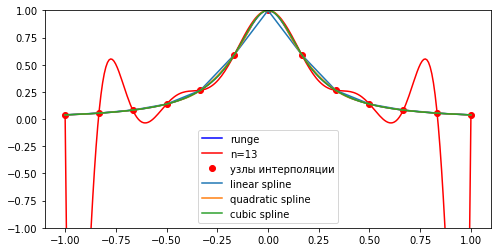

In [174]:
xx = np.linspace(-1, 1, 250)
x13, p13 = runge_interpolate(13)
x14, p14 = runge_interpolate(14)
f = interp1d(x13,  runge(x13))
f2 = interp1d(x13, runge(x13), kind='quadratic')
f3 = interp1d(x13,  runge(x13), kind='cubic')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(xx, runge(xx), 'b', label='runge')
ax.plot(xx, p13(xx), 'r', label='n=13')
ax.plot(x13, runge(x13), 'ro', label='узлы интерполяции')
ax.plot(xx, f(xx), label='linear spline')
ax.plot(xx, f2(xx), label='quadratic spline')
ax.plot(xx, f3(xx), label='cubic spline')
ax.set_ylim([-1, 1])
ax.legend()
#ax.plot(xx, p14(xx), 'g')
#ax.plot(x14, runge(x14), 'go')


   # Spline сплайн-интерполяция

In [175]:
from scipy.interpolate import interp1d

In [176]:
x = np.linspace(0, 20, 21)
x

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [177]:
y = np.cos(-x**2/9)
y

array([ 1.        ,  0.99383351,  0.90284967,  0.54030231, -0.20550672,
       -0.93454613, -0.65364362,  0.6683999 ,  0.67640492, -0.91113026,
        0.11527995,  0.63863454, -0.95765948,  0.99742505, -0.97732268,
        0.99120281, -0.98556606,  0.76793549, -0.12796369, -0.7454455 ,
        0.89509715])

In [178]:
f = interp1d(x, y)
f2 = interp1d(x, y, kind='quadratic')
f3 = interp1d(x, y, kind='cubic')

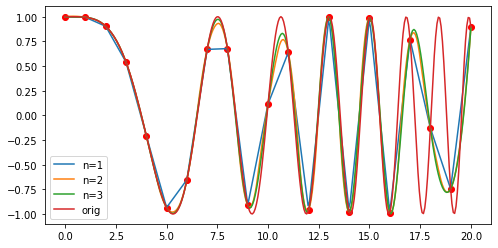

In [179]:
xx = np.linspace(x.min(), x.max(), 300)
#print(xx)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, y, 'ro')
ax.plot(xx, f(xx), label='n=1')
ax.plot(xx, f2(xx), label='n=2')
ax.plot(xx, f3(xx), label='n=3')
ax.plot(xx, np.cos(-xx**2/9), label='orig')
ax.legend()
    

Для того, чтобы посмотреть насколько хороши сплайны, нарисуем исходную функцию Рунге, точки и кубические сплайны.



Text(0.5, 0, '$x$')

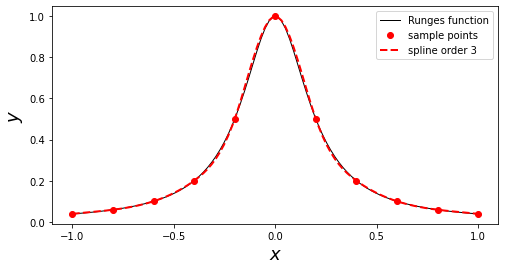

In [195]:
x = np.linspace(-1, 1, 11)
y = runge(x)
f_i = interpolate.interp1d(x, y, kind=3)
xx = np.linspace(-1, 1, 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(xx, runge(xx), 'k', lw=1, label="Runges function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f_i(xx), 'r--', lw=2, label='spline order 3')
ax.legend()
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

Здесь мы используем 11 заданных точек и сплайн 3 порядка. Заметим, что интерполянт очень хорошо совпадает с оригинальной функцией. Обычно сплайн-интерполяция порядка 3 или меньше не подвержена биениям, которые мы наблюдали в полиномах высокой степени. И достаточно использовать сплайны 3 порядка, если у нас достаточно много данных.

Для иллюстрации влияния порядка сплайна, решим задачу интерполяции на точках (0,3), (1, 4), (2, 3.5), (4, 2), (5, 1.5), (6, 1.25) и (7, 0.7) со сплайнами возрастающей степени.

Сначала определим массивы х и у, далее в цикле будем изменять требуемый порядок интерполяции, вычисляя интерполянт и рисуя его: 

ValueError: ignored

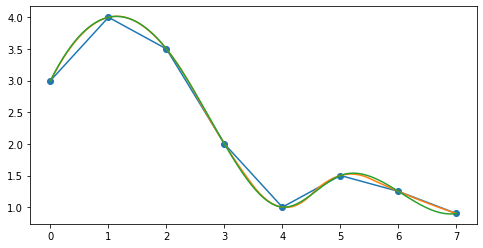

In [197]:
x= np.array([0, 1, 2, 3, 4, 5, 6, 7])
y= np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])
xx = np.linspace(x.min(), x.max(), 100)
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y)
for n in [1, 2, 3, 6]:
  f = interpolate.interp1d(x, y, kind=n)
  ax.plot(xx, f(xx), label='order %d' % n)

ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

# Метод fit для степенного полинома и полинома Чебышева


In [187]:
#from numpy.polynomial import polynomial as P

f1b = P.Polynomial.fit(x, y, deg)
f1b




Polynomial([-0.15111818,  0.18791035,  0.76130689, -0.68887079], domain=[ 0., 20.], window=[-1.,  1.])

In [188]:
P.Polynomial([ 4.1875, 3.1875, -1.6875, -1.6875], [ 1., 4.], [-1., 1.])
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 0.22953526, -0.32874274,  0.38065344, -0.1722177 ], domain=[ 0., 20.], window=[-1.,  1.])

Получен вектор коэффициентов $[4.1875,3.1875,-1.6875,-1.6875]$ в степенном базисе, то есть интерполяционный полином $f(x)=4.1875+3.1875 * x-1.6875 * x^{2}-1.6875^{*} x^{3} .$
Используем найденный массив коэффициентов для дальнейшего вычисления значения в точке: 

In [189]:
f1b(2.5) 

0.42680153880036564

Как и ожидалось, в другом базисе получились другие коэффициенты и интерполяционный многочлен в базисе Чебышева 

$f(x)=3.34375 * T_{0}(x)-1.921875 * T_{1}(x)-0.84375 * T_{2}(x)-0.421875 * T_{3}(x)$

 Однако, не зависимо от базиса, интерполяционный многочлен единственный и вычисляя значение в точке получаем такое же число:

In [190]:
f2b(2.5)

0.4268015388003652

Посмотрим на эти два полинома вместе на одном графике:



Text(0.5, 0, '$x$')

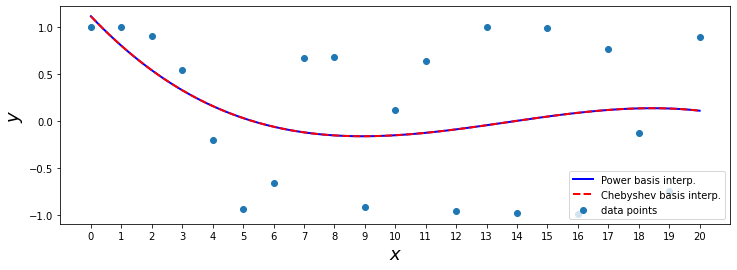

In [192]:
xx = np.linspace(x.min(), x.max(), 100) # supersampled [x[0], x[-1]] interval
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(xx, f1b(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2b(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')
ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

Заметим, что этот метод автоматически устанавливает атрибут domain в правильное значение (в примере отрезок был от 1 до 4), коэффициенты устанавливаются тоже соответствующим образом.

Отображение интерполяционных данных в отрезок, который лучше подходит для выбранного базиса, может существенно улучшить численную стабильность интерполяции. Например, использование полиномов Чебышева на отрезке $[-1,1]$ а не на заданном $[1,4]$ уменьшает число обусловленности с почти 4660 до $1.85.$  

Чем ближе число обусловленности к 1, тем меньше погрешность интерполянта. 

In [193]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))     # x = [1, 2, 3, 4]

47062.33692181253

In [194]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg))  # (2*x-5)/3.0 = [-1, -5/3, 1/3, 1]

4253.097714355576

# Символьные вычисления для полиноминальной интерполяции.

Можно. Если точек немного используйте интерполяцию (степенную) модуля sympy:

http://docs.sympy.org/latest/modules/polys/reference.html  

In [198]:
from sympy.polys.polyfuncs import interpolate
import sympy
x = sympy.symbols('x')

In [199]:
interpolate([1, 4, 9, 16], x)

x**2

In [200]:
interpolate([(1, 1), (2, 4), (3, 9)], x)

x**2

In [202]:
interpolate([(-1, 2), (1, 2), (2, 5)], x)

x**2 + 1

In [203]:
interpolate({-1: 2, 1: 2, 2: 5}, x)

x**2 + 1

In [206]:
sympy.polys.specialpolys.interpolating_poly(n, x, X=[1,2,3,4,5,6,7], Y=[2,0,-1,1,2,3,2])


-(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)/60 + (x - 6)*(x - 5)*(x - 4)*(x - 2)*(x - 1)/12 + (x - 6)*(x - 5)*(x - 3)*(x - 2)*(x - 1)/12 - (x - 6)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/12 + (x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)/40